### importing libraries

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data
        Since data is in form of excel file we have to use pandas read_excel to load the data

In [294]:
data = pd.read_excel(r"C:\Users\HP\Desktop\sample_project_1\flight_price _prediction\Data_Train.xlsx")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [296]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### checking for null values

In [297]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [298]:
data[data["Route"].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


#### as we have 1 missing value , we can directly drop this one

In [299]:
data.dropna(inplace =True)

In [300]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## sice our this is time series problem we need to Pre-process & Perform Featurization of "Date_of_Journey"
    ie pre-process it & extract day,month,year from "Date_of_Journey" feature..

In [301]:
def change_to_datetime(col):
    data[col]=pd.to_datetime(data[col])

In [302]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [303]:
import warnings
warnings.filterwarnings('ignore')


In [304]:
for features in ["Date_of_Journey","Dep_Time","Arrival_Time"]:
    change_to_datetime(features)


In [305]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-07-19 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-07-19 05:50:00,2023-07-19 13:15:00,7h 25m,2 stops,No info,7662


In [307]:
data['journey_year']=data['Date_of_Journey'].dt.year
data['journey_month']=data['Date_of_Journey'].dt.month
data['journey_day']=data['Date_of_Journey'].dt.day

In [308]:
data.drop('Date_of_Journey',axis=1,inplace=True) #sice now their is no use of this column we can dreop

## As plotly give better visualisation and interctive graph we are using it 

In [309]:
import plotly
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

#### Analyzing which Airline is most used

In [310]:
import plotly.graph_objects as go
labels = data['Airline']
trace = go.Pie(labels=labels)
layout = go.Layout(title='Airline percentage')
fig = go.Figure(data=[trace], layout=layout)
fig.show()


In [311]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-07-19 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-07-19 05:50:00,2023-07-19 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5


### analyzing which cities has the most starting and ending points

In [312]:
from plotly.subplots import make_subplots
labels1 =data['Source']
title1 = 'starting point of journey'
labels2 = data['Destination']
title2 = 'ending point of journey'
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'pie'}]])
fig.add_trace(go.Pie(labels=labels1), row=1, col=1)
fig.add_trace(go.Pie(labels=labels2), row=1, col=2)
fig.update_layout(
    title='starting and ending places',
    annotations=[
        dict(text=title1, x=0.225, y=1.12, font_size=14, showarrow=False, xref='paper', yref='paper'),
        dict(text=title2, x=0.775, y=1.12, font_size=14, showarrow=False, xref='paper', yref='paper')
    ],
    showlegend=True
)

fig['data'][1].legendgroup = fig['data'][0].legendgroup
fig['data'][1].marker.colors = fig['data'][0].marker.colors

fig.show()


### Using voilin plot to check for outliers and q1 ,median and q3 

In [313]:
trace = go.Violin(y=data['Price'] ,x=data['Airline'],box_visible=True, meanline_visible=True)
layout = go.Layout(title='Violin Plot')
fig = go.Figure(data=[trace], layout=layout)
fig.show()


### checking for trend of price with total travel time

In [314]:
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-07-19 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-07-19 05:50:00,2023-07-19 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5,445


In [315]:
coefficients = np.polyfit(data["Duration_total_mins"],data['Price'], 1)
regression_line = np.polyval(coefficients, data["Duration_total_mins"])

trace_scatter = go.Scatter(x=data["Duration_total_mins"], y=data['Price'], mode='markers', name='Data')
trace_regression = go.Scatter(x=data["Duration_total_mins"], y=regression_line, mode='lines', name='Regression Line')
layout = go.Layout(title='relation of price with total time')
fig = go.Figure(data=[trace_scatter, trace_regression], layout=layout)
fig.show()


### Checking for timimg of flight
          early morning, morning, noon, evening, night, late night

In [316]:
def flight_dep_time(x):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    '''
    if ( x> 4) and (x<=8 ):
        return 'Early mrng'
    
    elif ( x>8 ) and (x<=12 ):
        return 'Morning'
    
    elif ( x>12 ) and (x<=16 ):
        return 'Noon'
    
    elif ( x>16 ) and (x<=20 ):
        return 'Evening'
    
    elif ( x>20 ) and (x<=24 ):
        return 'Night'
    else:
        return 'Late night'

### making columns for dep time and arrival time extracting hour and minute

In [317]:
def extract_hour_min(data,col):
    data[col+'_hour']=data[col].dt.hour
    data[col+'_minute']=data[col].dt.minute
    data.drop(col,axis=1,inplace=True)
    return data.head(2)

In [318]:
for features in ["Dep_Time","Arrival_Time"]:
    extract_hour_min(data ,features)

In [319]:
data['departure_timing']=data['Dep_Time_hour'].apply(flight_dep_time)

In [320]:
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
cf.go_offline()

In [321]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

In [322]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day,Duration_total_mins,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,departure_timing
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,170,22,20,1,10,Night
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,445,5,50,13,15,Early mrng


#### 
        As my ML model is not able to understand this duration as it contains string values , thats why we have to tell our
        Ml Model that this is Duration_hour & this Duration_is minute..

In [323]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x
    

In [324]:
data['Duration']=data['Duration'].apply(preprocess_duration)
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [325]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

## As this data is only of year 2019 hence year column is constant which will not play any role 

In [326]:
data.drop(columns=['Duration','Additional_Info','journey_year','departure_timing','Route'],axis=1,inplace=True)

In [327]:
data

,Airline,Source,Destination,Total_Stops,Price,journey_month,journey_day,Duration_total_mins,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,170,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,445,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,1140,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,325,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,285,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,150,19,55,22,25
10679,Air India,Kolkata,Banglore,non-stop,4145,4,27,155,20,45,23,20
10680,Jet Airways,Banglore,Delhi,non-stop,7229,4,27,180,8,20,11,20
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,160,11,30,14,10


In [328]:
data.dtypes

Airline                object
Source                 object
Destination            object
Total_Stops            object
Price                   int64
journey_month           int64
journey_day             int64
Duration_total_mins     int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
dtype: object

### Extracting categorical data & numerical data 

In [329]:
cat_col=[col for col in data.columns if data[col].dtype=='object']
num_col=[col for col in data.columns if data[col].dtype!='object']

In [330]:
cat_col


['Airline', 'Source', 'Destination', 'Total_Stops']

In [331]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

## Aplying one hor encoding using our own function but their are many other ways of doing it scikit learn library  one hot encoder also can used

In [332]:
for category in data['Source'].unique():
    data['Source_'+category]=data['Source'].apply(lambda x: 1 if x==category else 0)

In [333]:
data.drop(['Source'],axis=1,inplace=True)

In [334]:
data

,Airline,Destination,Total_Stops,Price,journey_month,journey_day,Duration_total_mins,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,New Delhi,non-stop,3897,3,24,170,22,20,1,10,1,0,0,0,0
1,Air India,Banglore,2 stops,7662,1,5,445,5,50,13,15,0,1,0,0,0
2,Jet Airways,Cochin,2 stops,13882,9,6,1140,9,25,4,25,0,0,1,0,0
3,IndiGo,Banglore,1 stop,6218,12,5,325,18,5,23,30,0,1,0,0,0
4,IndiGo,New Delhi,1 stop,13302,1,3,285,16,50,21,35,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Banglore,non-stop,4107,9,4,150,19,55,22,25,0,1,0,0,0
10679,Air India,Banglore,non-stop,4145,4,27,155,20,45,23,20,0,1,0,0,0
10680,Jet Airways,Delhi,non-stop,7229,4,27,180,8,20,11,20,1,0,0,0,0
10681,Vistara,New Delhi,non-stop,12648,1,3,160,11,30,14,10,1,0,0,0,0


In [335]:
for category in data['Destination'].unique():
    data['Destination_'+category]=data['Destination'].apply(lambda x: 1 if x==category else 0)

In [336]:
data.drop(['Destination'],axis=1,inplace=True)

In [358]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,10673,10674,10675,10676,10677,10678,10679,10680,10681,10682
Airline,3,7,10,3,3,1,10,10,10,8,...,10,10,7,8,1,2,7,10,5,7
Total_Stops,0,2,2,1,1,0,1,1,1,1,...,2,1,0,1,0,0,0,0,0,2
Price,3897,7662,13882,6218,13302,3873,11087,22270,11087,8625,...,16704,11087,3100,9794,3257,4107,4145,7229,12648,11753
journey_month,3,1,9,12,1,6,12,1,12,5,...,5,12,9,1,5,9,4,4,1,9
journey_day,24,5,6,5,3,24,3,3,3,27,...,27,3,6,5,21,4,27,27,3,5
Duration_total_mins,170,445,1140,325,285,145,930,1265,1530,470,...,900,1485,80,520,160,150,155,180,160,500
Dep_Time_hour,22,5,9,18,16,9,18,8,8,11,...,13,20,6,10,5,19,20,8,11,10
Dep_Time_minute,20,50,25,5,50,0,55,0,55,25,...,25,35,20,20,55,55,45,20,30,55
Arrival_Time_hour,1,13,4,23,21,11,10,5,10,19,...,4,21,7,19,8,22,23,11,14,19
Arrival_Time_minute,10,15,25,30,35,25,25,5,25,15,...,25,20,40,0,35,25,20,20,10,15


In [338]:
data.groupby(['Airline'])['Price'].mean()

Airline
Air Asia                              5590.260188
Air India                             9612.427756
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

### Performing Target Guided Mean Encoding 
ofcourse we can use One-hot , but if we have more sub-categories , it creates curse of dimensionality in ML..
lets use Target Guided Mean Encoding in order to get rid of this..

In [339]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [340]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [341]:
dict1={key:index for index,key in enumerate(airlines,0)}

In [342]:
data['Airline']=data['Airline'].map(dict1)

In [343]:
data.head(5)

,Airline,Total_Stops,Price,journey_month,journey_day,Duration_total_mins,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,...,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Destination_New Delhi,Destination_Banglore,Destination_Cochin,Destination_Kolkata,Destination_Delhi,Destination_Hyderabad
0,3,non-stop,3897,3,24,170,22,20,1,10,...,0,0,0,0,1,0,0,0,0,0
1,7,2 stops,7662,1,5,445,5,50,13,15,...,1,0,0,0,0,1,0,0,0,0
2,10,2 stops,13882,9,6,1140,9,25,4,25,...,0,1,0,0,0,0,1,0,0,0
3,3,1 stop,6218,12,5,325,18,5,23,30,...,1,0,0,0,0,1,0,0,0,0
4,3,1 stop,13302,1,3,285,16,50,21,35,...,0,0,0,0,1,0,0,0,0,0


In [345]:
data.head(5)

,Airline,Total_Stops,Price,journey_month,journey_day,Duration_total_mins,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,...,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Destination_New Delhi,Destination_Banglore,Destination_Cochin,Destination_Kolkata,Destination_Delhi,Destination_Hyderabad
0,3,non-stop,3897,3,24,170,22,20,1,10,...,0,0,0,0,1,0,0,0,0,0
1,7,2 stops,7662,1,5,445,5,50,13,15,...,1,0,0,0,0,1,0,0,0,0
2,10,2 stops,13882,9,6,1140,9,25,4,25,...,0,1,0,0,0,0,1,0,0,0
3,3,1 stop,6218,12,5,325,18,5,23,30,...,1,0,0,0,0,1,0,0,0,0
4,3,1 stop,13302,1,3,285,16,50,21,35,...,0,0,0,0,1,0,0,0,0,0


In [346]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [347]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [348]:
data['Total_Stops']=data['Total_Stops'].map(stops)

In [349]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,10673,10674,10675,10676,10677,10678,10679,10680,10681,10682
Airline,3,7,10,3,3,1,10,10,10,8,...,10,10,7,8,1,2,7,10,5,7
Total_Stops,0,2,2,1,1,0,1,1,1,1,...,2,1,0,1,0,0,0,0,0,2
Price,3897,7662,13882,6218,13302,3873,11087,22270,11087,8625,...,16704,11087,3100,9794,3257,4107,4145,7229,12648,11753
journey_month,3,1,9,12,1,6,12,1,12,5,...,5,12,9,1,5,9,4,4,1,9
journey_day,24,5,6,5,3,24,3,3,3,27,...,27,3,6,5,21,4,27,27,3,5
Duration_total_mins,170,445,1140,325,285,145,930,1265,1530,470,...,900,1485,80,520,160,150,155,180,160,500
Dep_Time_hour,22,5,9,18,16,9,18,8,8,11,...,13,20,6,10,5,19,20,8,11,10
Dep_Time_minute,20,50,25,5,50,0,55,0,55,25,...,25,35,20,20,55,55,45,20,30,55
Arrival_Time_hour,1,13,4,23,21,11,10,5,10,19,...,4,21,7,19,8,22,23,11,14,19
Arrival_Time_minute,10,15,25,30,35,25,25,5,25,15,...,25,20,40,0,35,25,20,20,10,15


In [356]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)


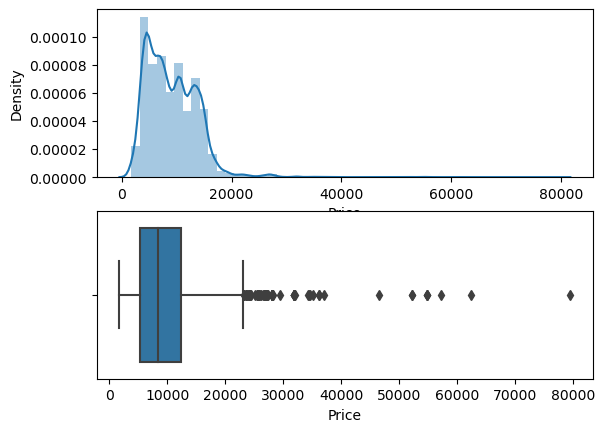

In [357]:
plot(data,'Price')

In [366]:
import plotly.graph_objects as go
import pandas as pd

# Sample data

# Create a box plot
fig = go.Figure()
fig.add_trace(go.Box(y=data['Price'], boxpoints='outliers'))

# Update layout and display the figure
fig.update_layout(title='price range ', yaxis_title='Price',height=600,width=900)
fig.show()


## since our data has outliers which can affect our ML model badly hence replacing it with median

In [367]:
data['Price']=np.where(data['Price']>=32000,data['Price'].median(),data['Price'])

In [368]:
import plotly.graph_objects as go
import pandas as pd

# Sample data

# Create a box plot
fig = go.Figure()
fig.add_trace(go.Box(y=data['Price'], boxpoints='outliers'))

# Update layout and display the figure
fig.update_layout(title='price range ', yaxis_title='Price',height=600,width=900)
fig.show()


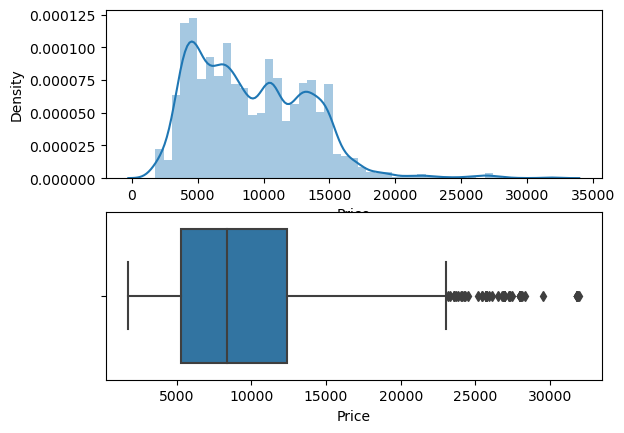

In [370]:
plot(data,'Price') 

In [372]:
data.head(2)

,Airline,Total_Stops,Price,journey_month,journey_day,Duration_total_mins,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,...,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Destination_New Delhi,Destination_Banglore,Destination_Cochin,Destination_Kolkata,Destination_Delhi,Destination_Hyderabad
0,3,0,3897.0,3,24,170,22,20,1,10,...,0,0,0,0,1,0,0,0,0,0
1,7,2,7662.0,1,5,445,5,50,13,15,...,1,0,0,0,0,1,0,0,0,0


# Now our data is ready 

## using diffrent ml learning models

In [373]:
from sklearn.feature_selection import mutual_info_regression

In [374]:
X=data.drop(['Price'],axis=1)

In [375]:
y=data['Price']

In [376]:
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['importance']

### checking feature importance 

In [377]:
imp.sort_values(by='importance',ascending=False)

,importance
Airline,0.967890
Total_Stops,0.782589
Source_Delhi,0.530000
Destination_Cochin,0.511878
Duration_total_mins,0.495668
Destination_Banglore,0.456859
Source_Kolkata,0.455491
Arrival_Time_hour,0.389376
Source_Banglore,0.383584
Arrival_Time_minute,0.348743


In [378]:
from sklearn.model_selection import train_test_split

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [408]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

## creating function to  check different metrices and R2 score

In [405]:
def predict(ml_model):
    
    model=ml_model.fit(X_train,y_train)
    print('Training_score: {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE : ', mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)
    

## Using Randomforestregressor

In [382]:
from sklearn.ensemble import RandomForestRegressor

In [389]:
from sklearn.model_selection import RandomizedSearchCV

In [384]:
model_1=RandomForestRegressor()

In [386]:
n_estimators=[50,100,200,300,500,750,1000,1500]
max_features=["auto", "sqrt"]
max_depth=[None,10,20,30,50,100]
min_samples_split=[5,10,15,100]

In [387]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
    }

In [394]:
%%time
model_1_cv=RandomizedSearchCV(model_1,param_distributions=random_grid,cv=5,verbose=2,n_jobs=-1)

Wall time: 0 ns


In [395]:
model_1_cv.fit(X_train,y_train)
%%time

Fitting 5 folds for each of 10 candidates, totalling 50 fits


UsageError: Line magic function `%%time` not found.


In [396]:
model_1_cv.best_params_

{'n_estimators': 1500,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': None}

In [397]:
model_1_cv.best_estimator_

RandomForestRegressor(min_samples_split=15, n_estimators=1500)

In [403]:
model_1_cvd=RandomForestRegressor(min_samples_split=15, n_estimators=1500)

Training_score: 0.9021061032497821
Predictions are : [16889.79150232  5916.65453444  8591.43097925 ...  6876.28087925
 12112.76924387 12492.03134934]


r2_score: 0.8446389442184077
MSE :  3082137.619751514
MAE :  1144.5534332710922
RMSE :  1755.6017827945818
MAPE :  12.861025098124582
Wall time: 55.7 s


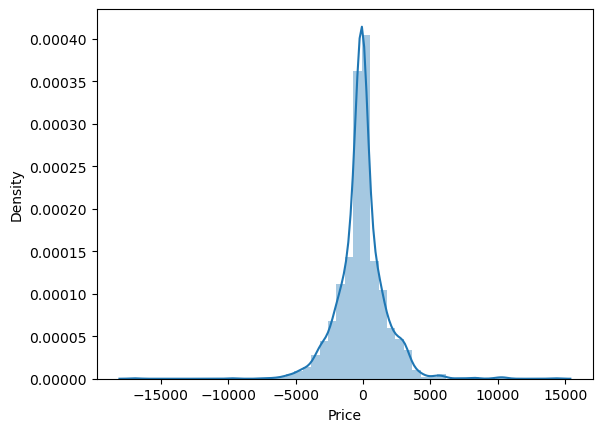

In [409]:
%%time
predict(model_1_cvd)

## using decision tree

In [410]:
from sklearn.tree import DecisionTreeRegressor

In [411]:
model_2 = DecisionTreeRegressor()

In [435]:
splitter =['best', 'random']
max_depth = [None,10,20,30,50,100]
mn_samples_split =  [5,10,15,100]
min_samples_leaf = [1, 2, 4]
max_features = ['auto', 'sqrt', 'log2', None]

In [436]:
param_grid = {'splitter': splitter,
    'max_depth': max_depth,
    'min_samples_split': mn_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features,
}

In [437]:
model_2_cv = RandomizedSearchCV(model_2, param_distributions=param_grid, cv=5,verbose=2, n_jobs=-1)

In [438]:
%%time
model_2_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 5.32 s


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 50,
                                                      100],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'splitter': ['best', 'random']},
                   verbose=2)

In [439]:
model_2_cv.best_params_

{'splitter': 'random',
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 100}

In [440]:
model_2_cv.best_estimator_

DecisionTreeRegressor(max_depth=100, max_features='auto', min_samples_leaf=2,
                      min_samples_split=15, splitter='random')

In [441]:
model_2_cvd = DecisionTreeRegressor(max_depth=100, max_features='auto', min_samples_leaf=2,
                      min_samples_split=15, splitter='random')

Training_score: 0.8638741112648974
Predictions are : [14945.75        6228.42857143  8755.33333333 ...  6184.15384615
 13088.16666667 12910.        ]


r2_score: 0.8086830967896228
MSE :  3795449.391821963
MAE :  1278.345191246127
RMSE :  1948.1913129418176
MAPE :  14.601454629207748
Wall time: 177 ms


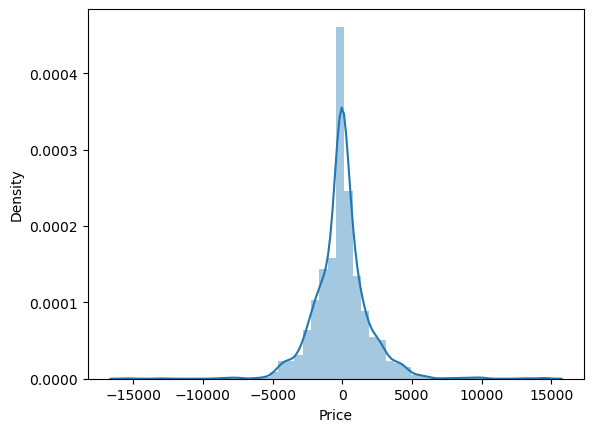

In [442]:
%%time
predict(model_2_cvd)

## using xgboost

In [443]:
import xgboost as xgb

In [444]:
model_3 = xgb.XGBRegressor(random_state=42)

In [445]:
max_depth = [None,10,20,30,50,100]

param_dist = {
    'learning_rate': np.arange(0.05, 0.31, 0.05),
    'max_depth': max_depth,
    'min_child_weight': np.arange(1, 11),
    'subsample': np.arange(0.6, 1.0, 0.1),
    'colsample_bytree': np.arange(0.6, 1.0, 0.1),
    'n_estimators': [100, 200, 300, 400, 500],
}

In [446]:
model_3_cv = RandomizedSearchCV(model_3, param_distributions=param_dist, n_iter=10, cv=5, verbose=1, n_jobs=-1, random_state=42)

In [447]:
model_3_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                         

In [449]:
model_3_cvd=model_3_cv.best_estimator_

Training_score: 0.9269727330748371
Predictions are : [16793.174   6328.0625  8387.636  ...  6662.3086 12687.946  12951.377 ]


r2_score: 0.8456487431759161
MSE :  3062104.6755901533
MAE :  1153.603697559462
RMSE :  1749.887046523333
MAPE :  12.944458564504666


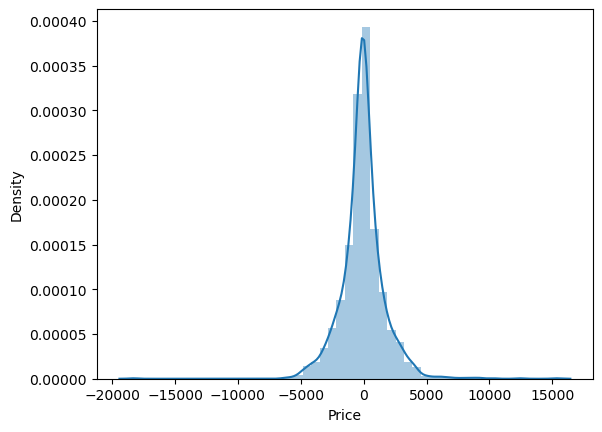

In [451]:
predict(model_3_cvd)

## using xgboost with normalisation

In [452]:
from sklearn.preprocessing import StandardScaler

In [453]:
scaler = StandardScaler()

In [454]:
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

In [458]:
X_train1

array([[ 0.42234182,  0.25829846, -0.17842226, ..., -0.19369619,
        -0.36714324, -0.26228419],
       [ 1.04888884,  0.25829846,  1.16544573, ..., -0.19369619,
        -0.36714324, -0.26228419],
       [-1.77057275,  0.25829846, -0.51438926, ..., -0.19369619,
        -0.36714324, -0.26228419],
       ...,
       [ 0.42234182,  0.25829846, -0.17842226, ..., -0.19369619,
        -0.36714324, -0.26228419],
       [-1.14402573, -1.22301721, -0.85035626, ..., -0.19369619,
        -0.36714324, -0.26228419],
       [ 1.04888884,  0.25829846, -1.52229025, ..., -0.19369619,
        -0.36714324, -0.26228419]])

In [459]:
model_4=model_3_cvd

In [461]:
model_4.fit(X_train1,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7999999999999999, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [462]:
y_prediction1=model_4.predict(X_test1)

r2_score: 0.8446500277733182
MSE :  3081917.73812559
MAE :  1157.518808596035
RMSE :  1755.5391588129244
MAPE :  13.004085521419887


<AxesSubplot:xlabel='Price', ylabel='Density'>

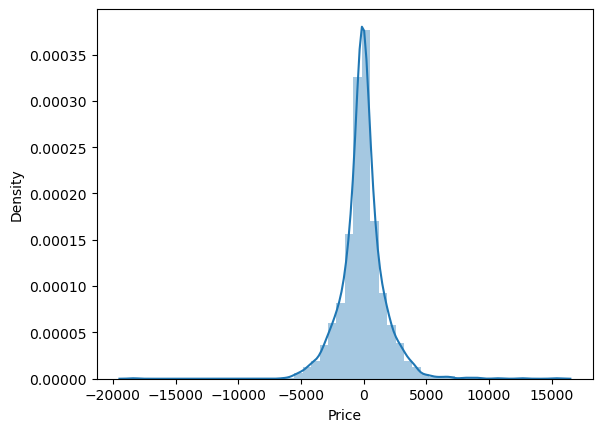

In [464]:
from sklearn import metrics
r2_score=metrics.r2_score(y_test,y_prediction1)
print('r2_score: {}'.format(r2_score))
print('MSE : ', metrics.mean_squared_error(y_test,y_prediction1))
print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction1))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction1)))
print('MAPE : ', mape(y_test,y_prediction1))
sns.distplot(y_test-y_prediction1)